In [24]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/Users/keshavdadhich/Documents/Task 3/Advertising (1).csv')


In [5]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


TV: Amount spent on TV advertising (in thousands of dollars).
Radio: Amount spent on Radio advertising (in thousands of dollars).
Newspaper: Amount spent on Newspaper advertising (in thousands of dollars).
Sales: Sales figures (in thousands of units) corresponding to the advertising spend.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [8]:
df.isnull().sum().any()


False

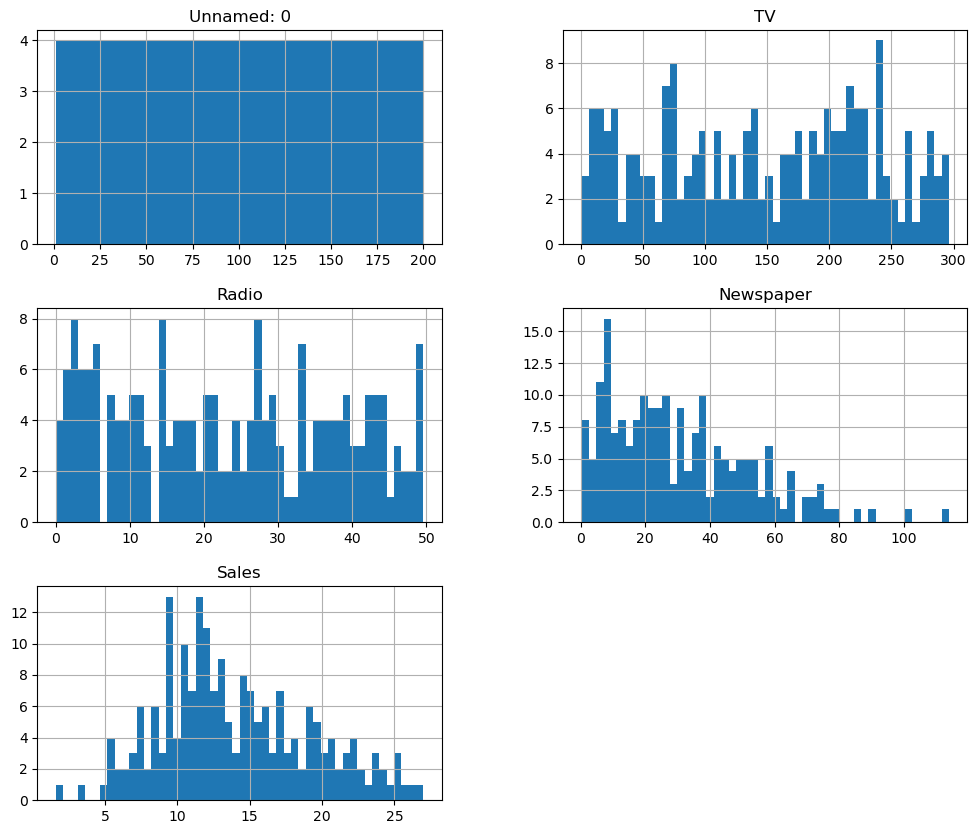

In [10]:
df.hist(figsize = (12,10), bins = 50)
plt.show()


In [12]:
df['Newspaper'] = np.log(df['Newspaper'])


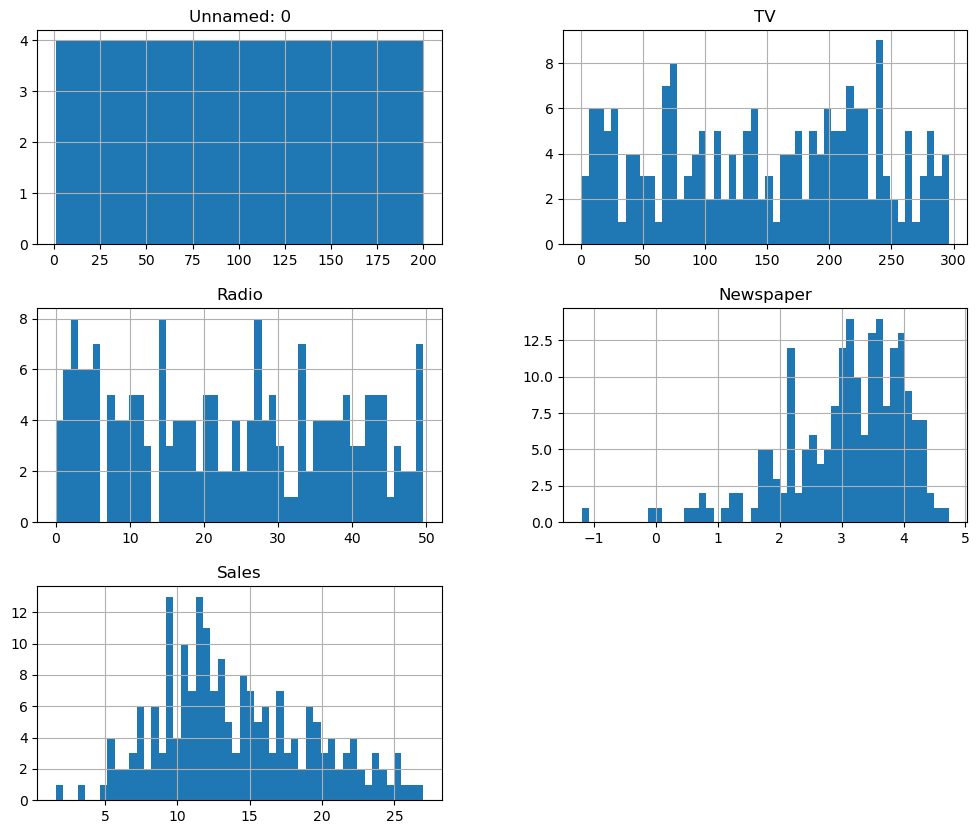

In [13]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

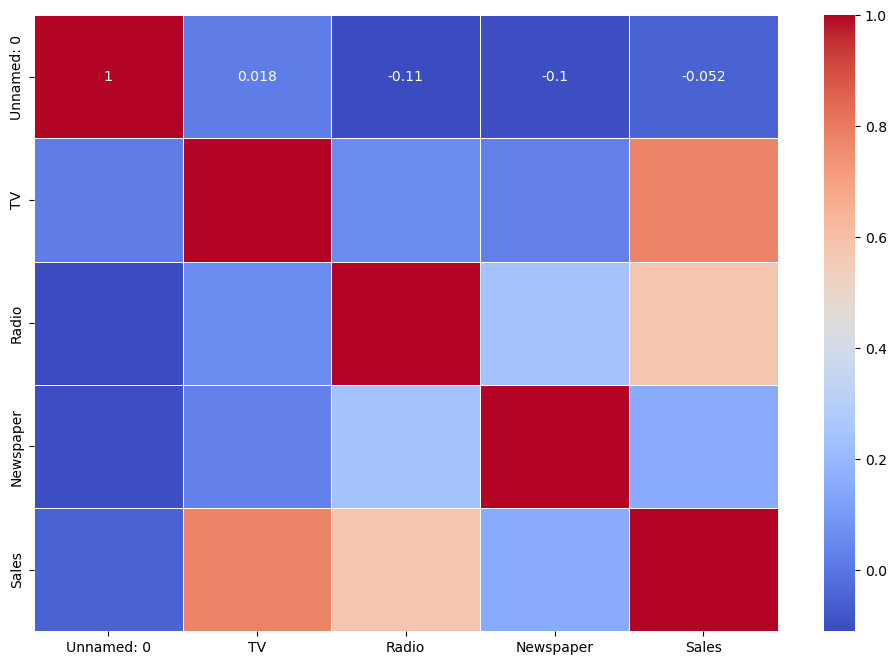

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [19]:
x = df.drop('Sales', axis = 1)
y = df.Sales

x, y = shuffle(x, y, random_state=42)

In [20]:
model_sfs = RandomForestRegressor(random_state = 42)


In [27]:
!pip install mlxtend

  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.3 MB/s eta 0:00:00a 0:00:01
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [32]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [33]:
sfs.fit(x,y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2024-12-03 16:44:39] Features: 1/4 -- score: -3.6708447094214263[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished

[2024-12-03 16:44:40] Features: 2/4 -- score: -0.6646838159852759[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jo

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 4),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [34]:
list(sfs.k_feature_names_)


['TV', 'Radio']

In [36]:
x = df[list(sfs.k_feature_names_)]
y = df.Sales

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

In [38]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [39]:
model_l.fit(xtrain,ytrain)


LinearRegression()

In [40]:
model_r.fit(xtest,ytest)


RandomForestRegressor()

In [41]:
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 3.137948009068354
Root Mean Squared Error (RMSE): 1.7714254173033517
Mean Absolute Error (MAE): 1.444302313822758
R-squared (R2): 0.9005833101920355
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


In [42]:
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.19405054999999707
Root Mean Squared Error (RMSE): 0.4405116911047845
Mean Absolute Error (MAE): 0.3552999999999981
R-squared (R2): 0.9938520768092196
Baseline MSE: 31.563593749999995
Baseline RMSE: 5.6181486051901475


In [43]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')

Mean MSE: 0.7079089999999992
Standard Deviation of MSE: 0.36403264566248766
Mean RMSE: 0.8166829463624625
Standard Deviation of RMSE: 0.20233132510989588
Mean MAE: 0.5767249999999999
Standard Deviation of MAE: 0.06341983559482707
Mean R-squared: 0.9713813405423215
Standard Deviation of R-squared: 0.012438873388698934



Test Set MSE: 0.4342139499999977
Test Set RMSE: 0.6589491255021116
Test Set MAE: 0.5428999999999967
Test Set R-squared: 0.9862432030573198
